# Student Exam Pass/Fail Prediction

**Objective:** Train and compare Logistic Regression, K-Nearest Neighbors, and Random Forest classifiers to predict student exam pass/fail status.

**Evaluation Metrics:** Accuracy, Confusion Matrix, F1-Score, ROC Curves

---

## 1. Import Libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    f1_score, roc_curve, auc, roc_auc_score
)

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore Dataset

In [2]:
# Load dataset
df = pd.read_csv('student_performance_analysis.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (50, 6)

First 5 rows:


,student_id,gender,hours_studied,attendance_percent,assignments_completed,test_score
0,1,Female,6.3,61,6,50.9
1,2,Male,7.6,62,7,51.8
2,3,Female,8.9,63,8,52.7
3,4,Male,10.2,64,9,53.6
4,5,Female,11.5,65,10,54.5


In [3]:
# Dataset info and statistics
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             50 non-null     int64  
 1   gender                 50 non-null     object 
 2   hours_studied          50 non-null     float64
 3   attendance_percent     50 non-null     int64  
 4   assignments_completed  50 non-null     int64  
 5   test_score             50 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB
None


Statistical Summary:


,student_id,hours_studied,attendance_percent,assignments_completed,test_score
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,10.850000,76.700000,9.500000,72.050000
std,14.57738,3.771875,11.935627,2.901442,13.119642
min,1.00000,5.000000,60.000000,5.000000,50.000000
25%,13.25000,7.600000,66.250000,7.000000,61.025000
50%,25.50000,10.850000,74.500000,9.500000,72.050000
75%,37.75000,14.100000,86.750000,12.000000,83.075000
max,50.00000,16.700000,99.000000,14.000000,94.100000


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")

Missing Values:
student_id               0
gender                   0
hours_studied            0
attendance_percent       0
assignments_completed    0
test_score               0
dtype: int64

Total missing: 0


## 3. Data Preprocessing

### Create binary target variable: Pass (1) if test_score >= 60, else Fail (0)

In [5]:
PASS_THRESHOLD = 60
df['pass_fail'] = (df['test_score'] >= PASS_THRESHOLD).astype(int)

print(f"Pass/Fail Distribution (Threshold: {PASS_THRESHOLD}):")
print(df['pass_fail'].value_counts())
print(f"\nPass Rate: {df['pass_fail'].mean()*100:.1f}%")

Pass/Fail Distribution (Threshold: 60):
pass_fail
1    38
0    12
Name: count, dtype: int64

Pass Rate: 76.0%


# Encode categorical variables

In [6]:
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
print(f"Gender Encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Gender Encoding: {'Female': np.int64(0), 'Male': np.int64(1)}


# Display updated dataframe

In [7]:
df.head()

,student_id,gender,hours_studied,attendance_percent,assignments_completed,test_score,pass_fail,gender_encoded
0,1,Female,6.3,61,6,50.9,0,0
1,2,Male,7.6,62,7,51.8,0,1
2,3,Female,8.9,63,8,52.7,0,0
3,4,Male,10.2,64,9,53.6,0,1
4,5,Female,11.5,65,10,54.5,0,0


# Define features and target

In [8]:
feature_cols = ['hours_studied', 'attendance_percent', 'assignments_completed', 'gender_encoded']
X = df[feature_cols]
y = df['pass_fail']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used: {feature_cols}")

Features shape: (50, 4)
Target shape: (50,)

Features used: ['hours_studied', 'attendance_percent', 'assignments_completed', 'gender_encoded']


# Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining class distribution:\n{y_train.value_counts()}")
print(f"\nTesting class distribution:\n{y_test.value_counts()}")

Training set: 40 samples
Testing set: 10 samples

Training class distribution:
pass_fail
1    30
0    10
Name: count, dtype: int64

Testing class distribution:
pass_fail
1    8
0    2
Name: count, dtype: int64


# Feature scaling

In [10]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied using StandardScaler")
print(f"Scaled training data mean: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Scaled training data std: {X_train_scaled.std(axis=0).round(2)}")

Feature scaling applied using StandardScaler
Scaled training data mean: [ 0. -0. -0. -0.]
Scaled training data std: [1. 1. 1. 1.]


## 4. Exploratory Data Analysis

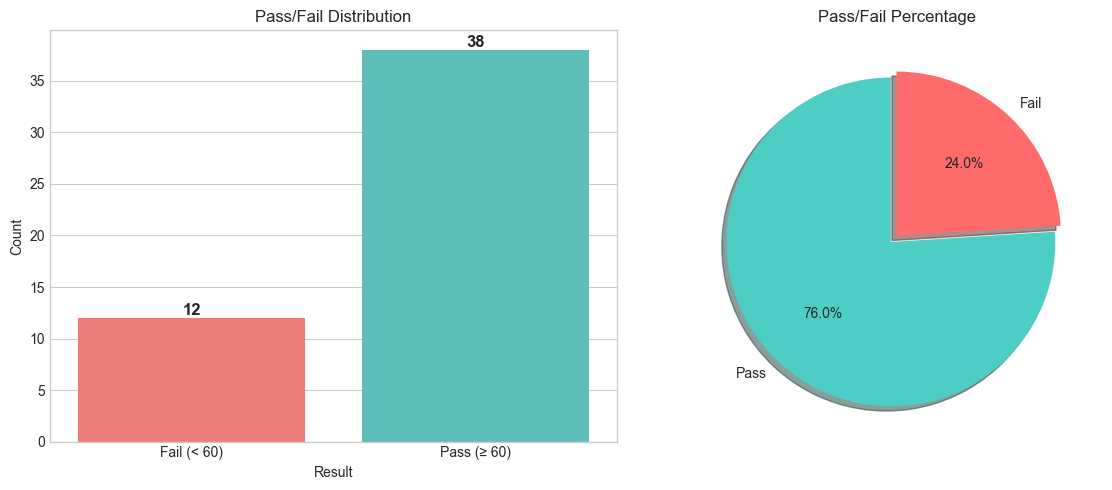

In [11]:
# Pass/Fail distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
colors = ['#ff6b6b', '#4ecdc4']
sns.countplot(data=df, x='pass_fail', ax=axes[0], palette=colors)
axes[0].set_xticklabels(['Fail (< 60)', 'Pass (≥ 60)'])
axes[0].set_xlabel('Result')
axes[0].set_ylabel('Count')
axes[0].set_title('Pass/Fail Distribution')

# Add count labels
for i, p in enumerate(axes[0].patches):
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width()/2., p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

# Pie chart
pass_counts = df['pass_fail'].value_counts()
axes[1].pie(pass_counts, labels=['Pass', 'Fail'], autopct='%1.1f%%', 
            colors=['#4ecdc4', '#ff6b6b'], explode=[0.05, 0],
            shadow=True, startangle=90)
axes[1].set_title('Pass/Fail Percentage')

plt.tight_layout()
plt.savefig('pass_fail_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

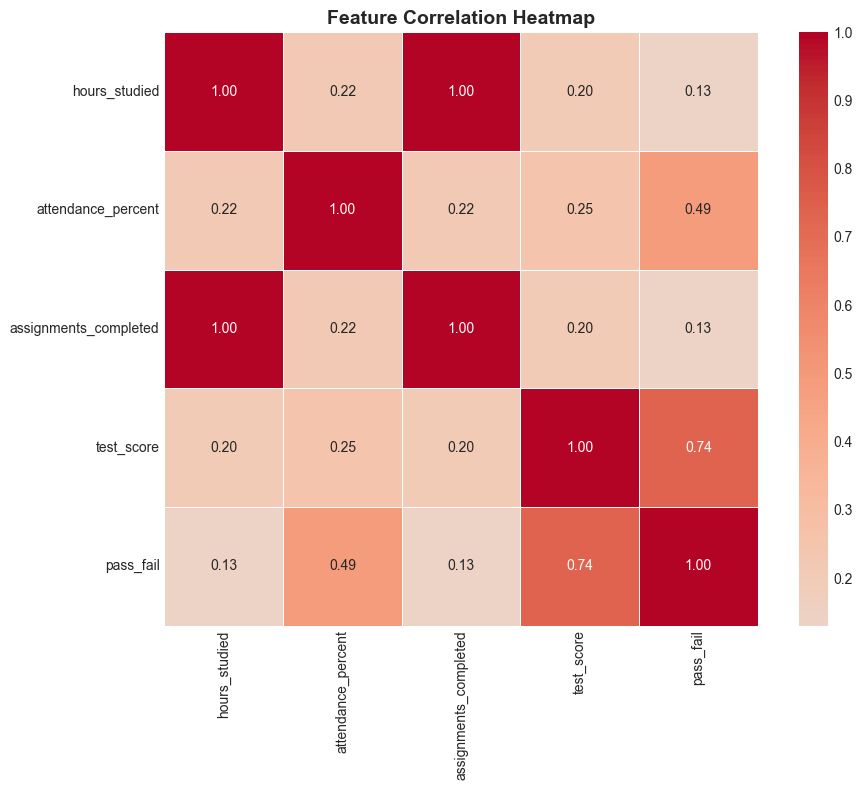

In [12]:
# Feature correlation heatmap
plt.figure(figsize=(10, 8))
correlation_cols = ['hours_studied', 'attendance_percent', 'assignments_completed', 'test_score', 'pass_fail']
correlation_matrix = df[correlation_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

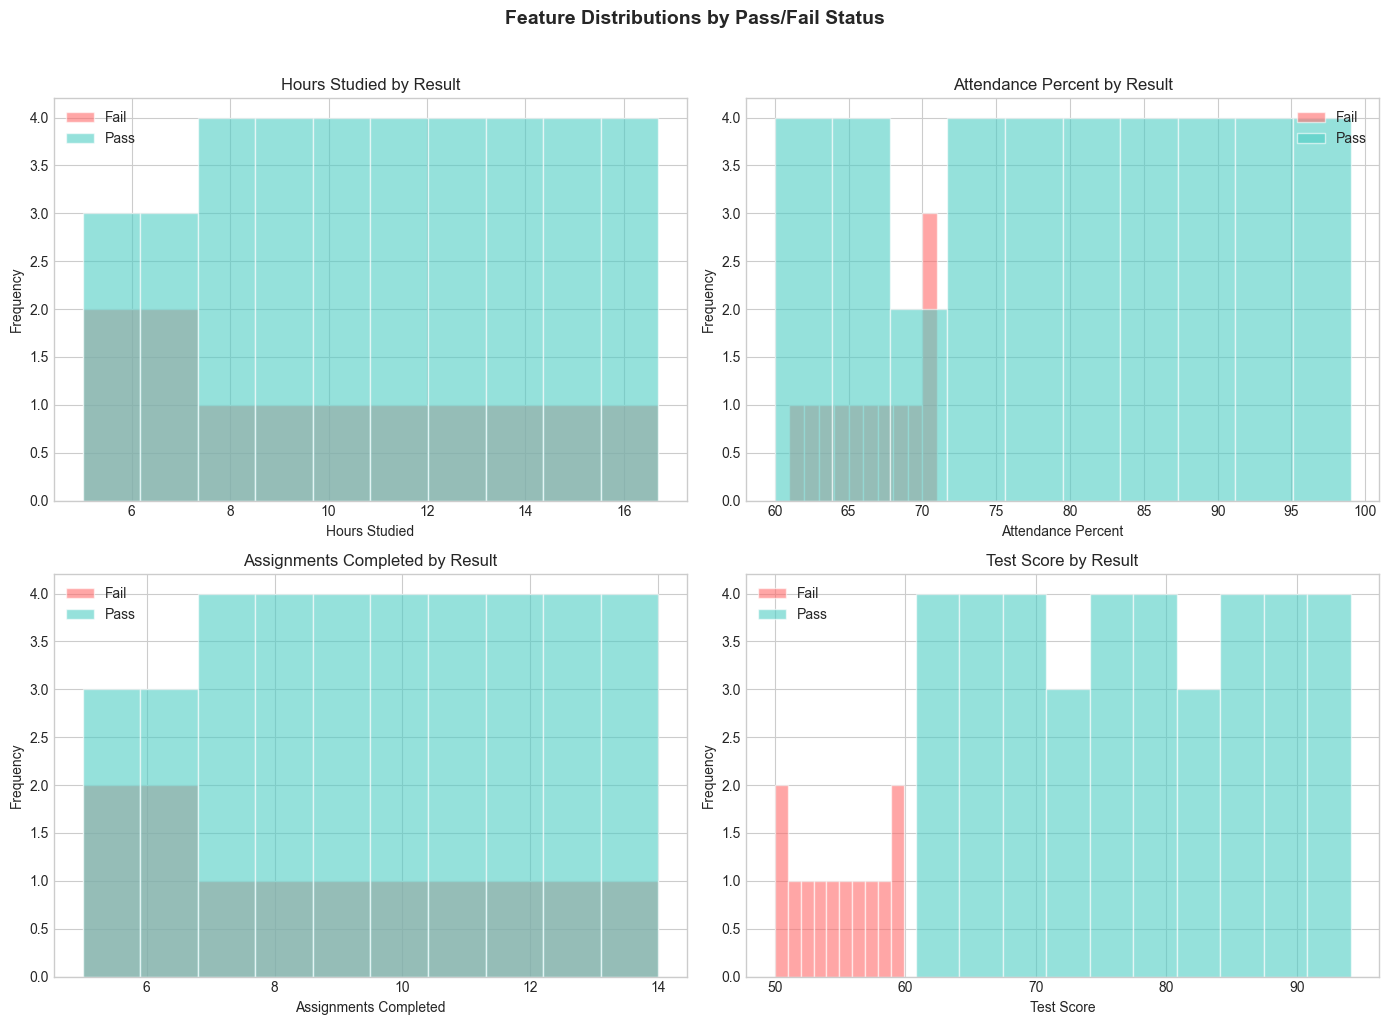

In [13]:
# Feature distributions by pass/fail status
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features_to_plot = ['hours_studied', 'attendance_percent', 'assignments_completed', 'test_score']

for idx, (ax, feature) in enumerate(zip(axes.flat, features_to_plot)):
    for label, color in zip([0, 1], ['#ff6b6b', '#4ecdc4']):
        data = df[df['pass_fail'] == label][feature]
        ax.hist(data, alpha=0.6, label=f"{'Pass' if label else 'Fail'}", 
                color=color, edgecolor='white', bins=10)
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel('Frequency')
    ax.set_title(f'{feature.replace("_", " ").title()} by Result')
    ax.legend()

plt.suptitle('Feature Distributions by Pass/Fail Status', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Model Training

In [14]:
# Dictionary to store models and results
models = {}
results = {}

print("="*60)
print("MODEL TRAINING")
print("="*60)

MODEL TRAINING


### 5.1 Logistic Regression

In [15]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

models['Logistic Regression'] = lr_model
results['Logistic Regression'] = {
    'predictions': lr_pred,
    'probabilities': lr_prob
}

print("Logistic Regression trained successfully!")
print(f"\nModel Coefficients:")
for feat, coef in zip(feature_cols, lr_model.coef_[0]):
    print(f"  {feat}: {coef:.4f}")
print(f"  Intercept: {lr_model.intercept_[0]:.4f}")

Logistic Regression trained successfully!

Model Coefficients:
  hours_studied: 0.0928
  attendance_percent: 1.3820
  assignments_completed: 0.0928
  gender_encoded: 0.1506
  Intercept: 1.5721


### 5.2 K-Nearest Neighbors (KNN)

Optimal K: 7 (CV Accuracy: 0.7750)


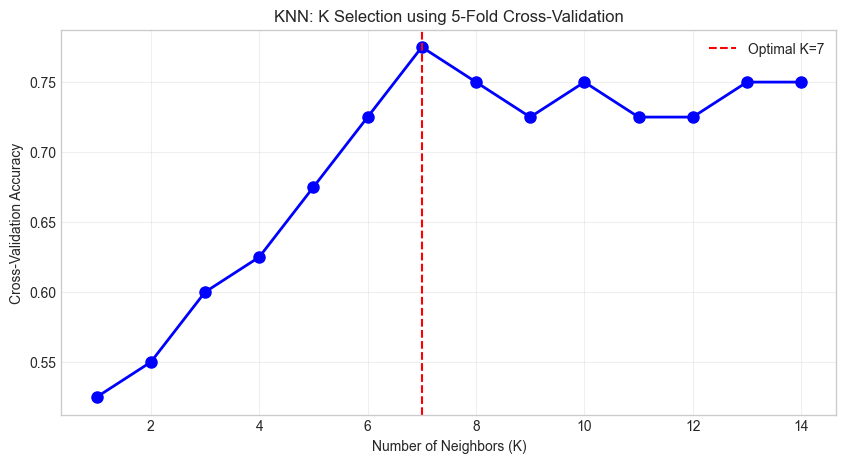

In [16]:
# Find optimal K using cross-validation
k_range = range(1, 15)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_range[np.argmax(cv_scores)]
print(f"Optimal K: {optimal_k} (CV Accuracy: {max(cv_scores):.4f})")

# Plot K selection
plt.figure(figsize=(10, 5))
plt.plot(k_range, cv_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: K Selection using 5-Fold Cross-Validation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('knn_k_selection.png', dpi=150, bbox_inches='tight')
plt.show()

In [17]:
# Train KNN with optimal K
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

models['KNN'] = knn_model
results['KNN'] = {
    'predictions': knn_pred,
    'probabilities': knn_prob
}

print(f"KNN (K={optimal_k}) trained successfully!")

KNN (K=7) trained successfully!


### 5.3 Random Forest

In [18]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

models['Random Forest'] = rf_model
results['Random Forest'] = {
    'predictions': rf_pred,
    'probabilities': rf_prob
}

print("Random Forest trained successfully!")
print(f"\nFeature Importances:")
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance.to_string(index=False))

Random Forest trained successfully!

Feature Importances:
              Feature  Importance
   attendance_percent    0.719524
        hours_studied    0.130840
assignments_completed    0.122741
       gender_encoded    0.026895


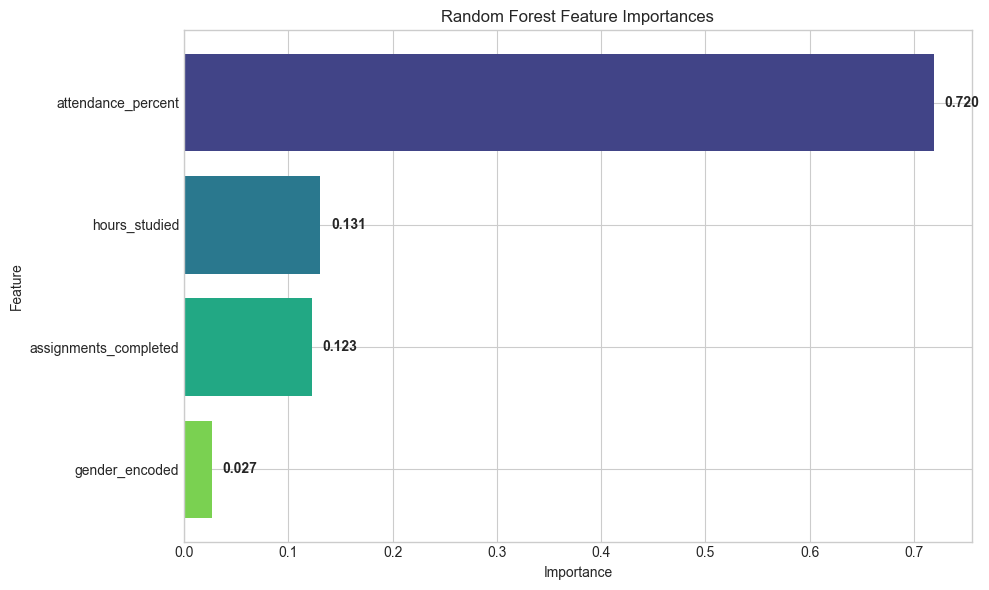

In [19]:
# Plot feature importances
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(feature_cols)))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()

# Add value labels
for bar, val in zip(bars, feature_importance['Importance']):
    plt.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importances.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Model Evaluation

In [20]:
# Calculate metrics for all models
evaluation_results = []

for model_name, result in results.items():
    pred = result['predictions']
    prob = result['probabilities']
    
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, prob)
    
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

eval_df = pd.DataFrame(evaluation_results)
print("\n" + "="*60)
print("MODEL EVALUATION SUMMARY")
print("="*60)
print(eval_df.to_string(index=False))


MODEL EVALUATION SUMMARY
              Model  Accuracy  F1-Score  ROC-AUC
Logistic Regression       0.7  0.823529   0.8750
                KNN       0.7  0.823529   0.5625
      Random Forest       0.5  0.666667   0.6250


In [21]:
# Detailed classification reports
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORTS")
print("="*60)

for model_name, result in results.items():
    print(f"\n{model_name}:")
    print("-" * 40)
    print(classification_report(y_test, result['predictions'], 
                                target_names=['Fail', 'Pass']))


DETAILED CLASSIFICATION REPORTS

Logistic Regression:
----------------------------------------
              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00         2
        Pass       0.78      0.88      0.82         8

    accuracy                           0.70        10
   macro avg       0.39      0.44      0.41        10
weighted avg       0.62      0.70      0.66        10


KNN:
----------------------------------------
              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00         2
        Pass       0.78      0.88      0.82         8

    accuracy                           0.70        10
   macro avg       0.39      0.44      0.41        10
weighted avg       0.62      0.70      0.66        10


Random Forest:
----------------------------------------
              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00         2
        Pass       0.71      0.62    

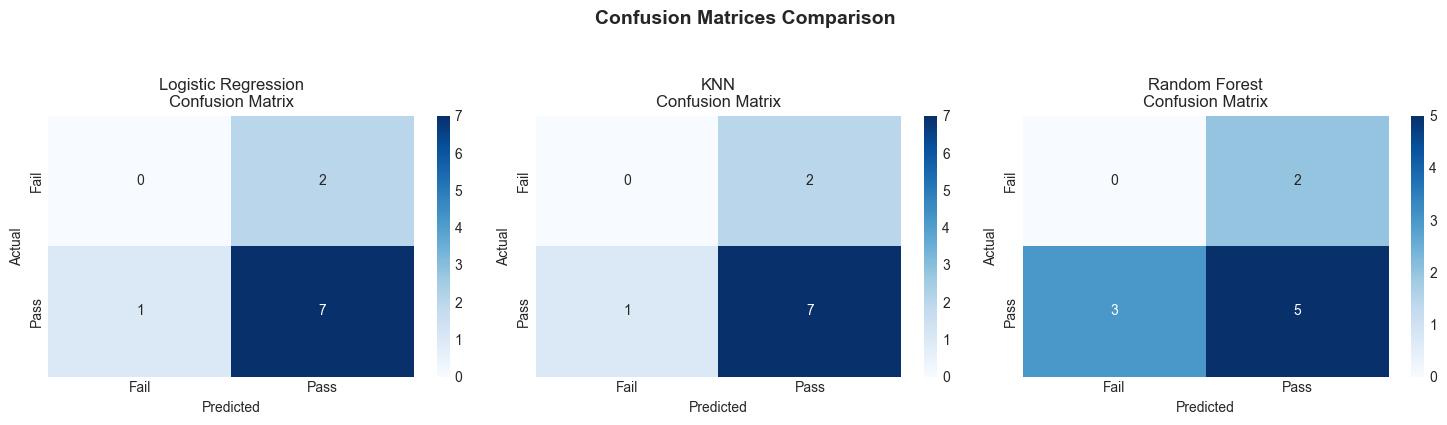

In [22]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_title(f'{model_name}\nConfusion Matrix')

plt.suptitle('Confusion Matrices Comparison', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

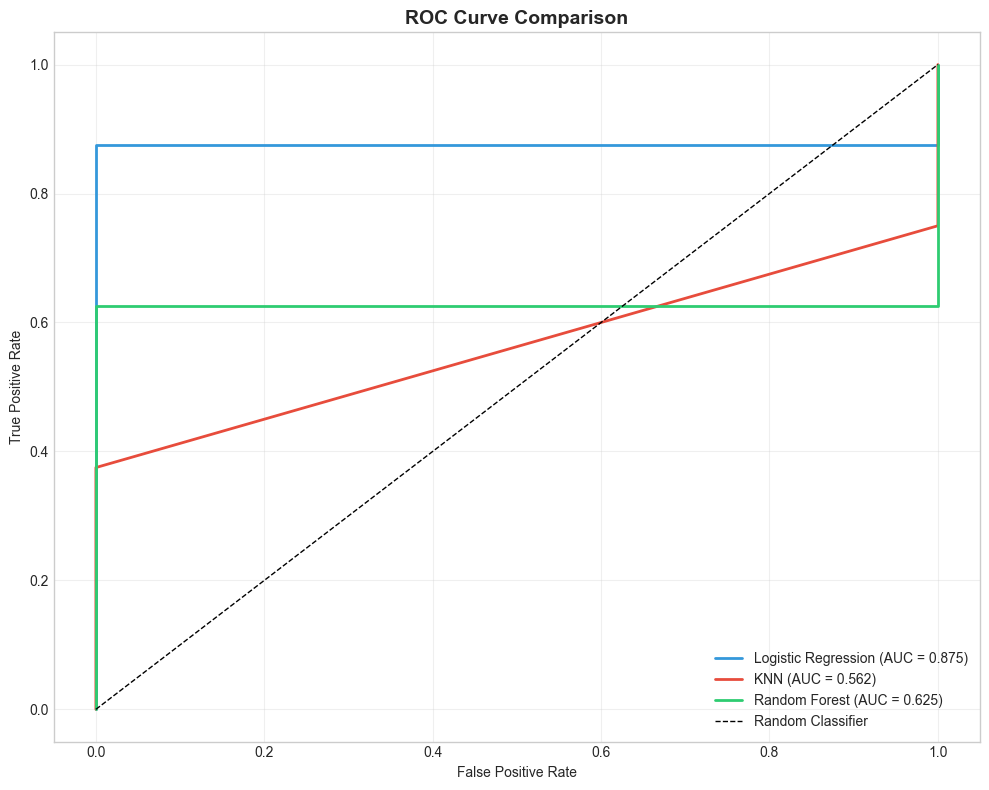

In [23]:
# ROC Curves
plt.figure(figsize=(10, 8))

colors = ['#3498db', '#e74c3c', '#2ecc71']
for (model_name, result), color in zip(results.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, linewidth=2,
             label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Model Comparison Summary

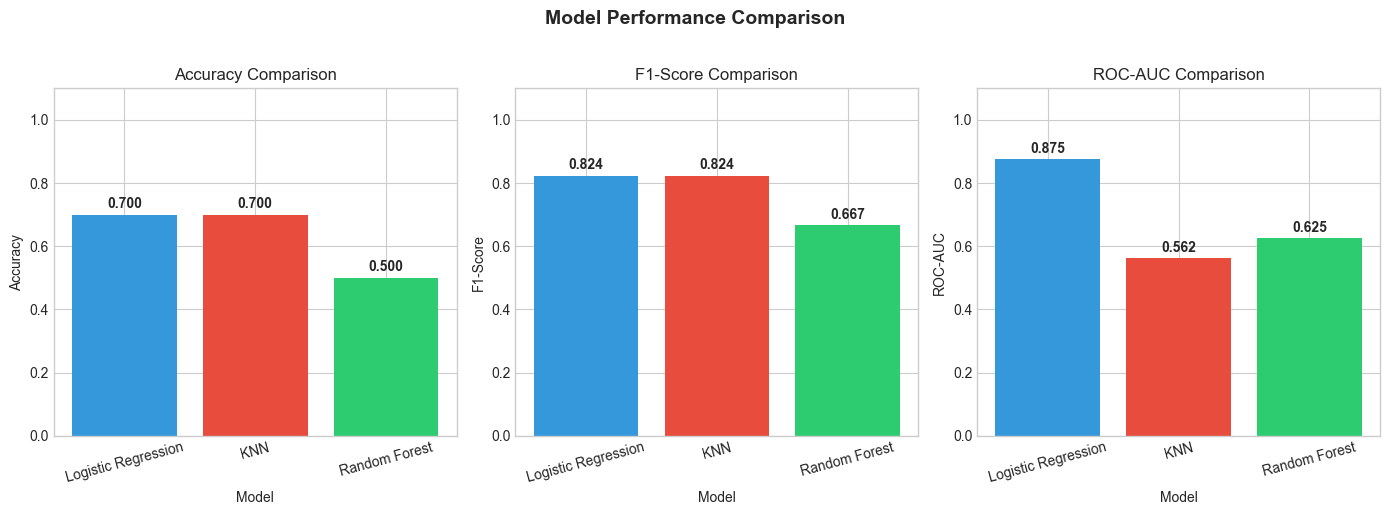

In [24]:
# Visual comparison of model metrics
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71']

for idx, metric in enumerate(metrics):
    values = eval_df[metric].values
    bars = axes[idx].bar(eval_df['Model'], values, color=colors)
    axes[idx].set_xlabel('Model')
    axes[idx].set_ylabel(metric)
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylim(0, 1.1)
    
    # Add value labels
    for bar, val in zip(bars, values):
        axes[idx].text(bar.get_x() + bar.get_width()/2, val + 0.02, 
                       f'{val:.3f}', ha='center', fontweight='bold')
    
    # Rotate x-axis labels
    axes[idx].tick_params(axis='x', rotation=15)

plt.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [25]:
# Save results to CSV
eval_df.to_csv('model_results.csv', index=False)
print("Results saved to 'model_results.csv'")
print("\n" + "="*60)
print("FINAL MODEL COMPARISON")
print("="*60)
print(eval_df.to_string(index=False))

Results saved to 'model_results.csv'

FINAL MODEL COMPARISON
              Model  Accuracy  F1-Score  ROC-AUC
Logistic Regression       0.7  0.823529   0.8750
                KNN       0.7  0.823529   0.5625
      Random Forest       0.5  0.666667   0.6250


## 8. Insights: Model Complexity vs Interpretability

### Summary Analysis

| Model | Complexity | Interpretability | Key Characteristics |
|-------|------------|------------------|--------------------|
| **Logistic Regression** | Low | High | Coefficients directly show feature impact. Easy to explain decision boundaries. |
| **KNN** | Medium | Medium | Instance-based learning. No explicit model parameters. Predictions based on neighbor similarity. |
| **Random Forest** | High | Low-Medium | Ensemble of trees. Feature importance available but individual predictions harder to explain. |

### Key Observations:

1. **Logistic Regression**: Most interpretable model. Each coefficient indicates how much a feature contributes to the pass/fail prediction. Ideal for regulatory scenarios requiring explanations.

2. **KNN**: Offers intuitive "similar students" explanations but lacks explicit model parameters. Sensitive to feature scaling and the choice of K.

3. **Random Forest**: Highest capacity for learning complex patterns. Provides feature importance rankings but individual predictions are harder to explain ("black box").

### Trade-off Consideration:
- For **high-stakes educational decisions**, Logistic Regression may be preferred despite potentially lower accuracy.
- For **maximum predictive performance** where interpretability is less critical, Random Forest is often the best choice.

In [26]:
# Print final summary
best_model = eval_df.loc[eval_df['Accuracy'].idxmax(), 'Model']
best_accuracy = eval_df['Accuracy'].max()
best_f1 = eval_df.loc[eval_df['F1-Score'].idxmax()]

print("\n" + "="*60)
print("CONCLUSION")
print("="*60)
print(f"\n🏆 Best Model by Accuracy: {best_model} ({best_accuracy:.1%})")
print(f"🏆 Best Model by F1-Score: {best_f1['Model']} ({best_f1['F1-Score']:.3f})")
print("\n✅ All models trained and evaluated successfully!")
print("📊 Visualizations saved as PNG files.")
print("📄 Results saved to 'model_results.csv'.")


CONCLUSION

🏆 Best Model by Accuracy: Logistic Regression (70.0%)
🏆 Best Model by F1-Score: Logistic Regression (0.824)

✅ All models trained and evaluated successfully!
📊 Visualizations saved as PNG files.
📄 Results saved to 'model_results.csv'.
